In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
# A world object
class RandomWorld():
    def __init__(self, rates, ntrials):
        '''
        rates: a list, rates of the world
        ntrials: a list, number of trials in each block
        '''
        self.rates = rates
        self.ntrials = ntrials
        self.curr_block = 0
        self.history = []
        self.rate_history = []
        self.curr_rate = self.rates[0]
        self.curr_side = np.random.rand() < self.curr_rate
        #print('curr side=  ', int(self.curr_side))
        
    def update(self, agent_choice):
        '''
        Update the world based on agent choice
        '''
        self.history.append(self.curr_side)
        self.rate_history.append(self.curr_rate)
        
        if agent_choice == self.curr_side:
            reward = 1
            # See if we should switch blocks
            # TODO: update this block
            self.curr_rate = self.curr_rate 
            
            # Sample the next side
            self.curr_side = np.random.rand() < self.curr_rate
        
        else:
            # Incorrect, keep the same side
            reward = 0
                    
        return reward
            
    

# An agent object
class MatchingAgent():
    '''
    Simulate an agent that matches perfectly (perfect integration of past rewards)
    '''
    def __init__(self):
        self.Rewards1side = 1 # Start with 1 so that the agent does not get 'stuck'
        self.Rewards0side = 1
        self.choice_history = []
        self.Rewards1side_history = []
        self.Rewards0side_history = []
        
    def outcome_received(self, outcome):
        if outcome == 1:
            if self.choice_history[-1] == 1:
                self.Rewards1side += 1
            else:
                self.Rewards0side += 1
                
        self.Rewards1side_history.append(self.Rewards1side)
        self.Rewards0side_history.append(self.Rewards0side)
            
        
    
    def make_choice(self):
        '''
        Make a choice, probabilistically sample from past reward ratios
        '''
        
        p = self.Rewards1side / (self.Rewards1side + self.Rewards0side)
        choice = np.random.rand() < p
        self.choice_history.append(choice)
        return choice
        
    
class Experiment():
    '''
    An experiment consists of an agent in a world
    '''
    def __init__(self, agent, world):
        self.agent = agent
        self.world = world
    
    

In [76]:
# Say we pick the choice randomly with prob 0.2
choices = []
rewards = []
for i in range(1000):
    choice = np.random.rand() < 0.7
    #print('choice = ', int(choice))
    choices.append(choice)
    reward = world.update(choice)
    rewards.append(reward)

In [86]:
def simulate_p_strategy(ntrials, pworld, pagent):
    world = RandomWorld([pworld], [10])
    # Say we pick the choice randomly with prob 0.2
    choices = []
    rewards = []
    for i in range(ntrials):
        choice = np.random.rand() < pagent
        #print('choice = ', int(choice))
        choices.append(choice)
        reward = world.update(choice)
        rewards.append(reward)
        
    efficiency = np.sum(rewards) / ntrials
    return efficiency
    
        
        

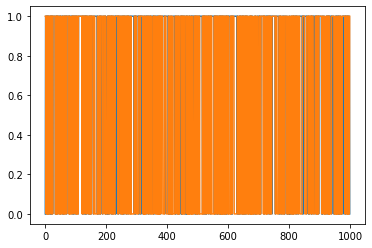

In [77]:
plt.plot(choices)
plt.plot(rewards)

In [98]:
# Let's plot the dependence on the p-strategy
N = 20
plst = np.linspace(0, 1, N)
results = np.zeros((N, N))
for idworld, pworld in enumerate(plst):
    for idagent, pagent in enumerate(plst):
        efficiency = simulate_p_strategy(1000, pworld=pworld, pagent=pagent)
        results[idworld][idagent] = efficiency
    

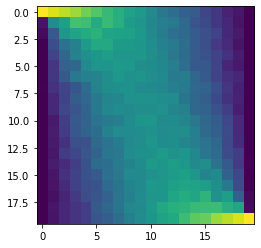

In [99]:
plt.imshow(results)

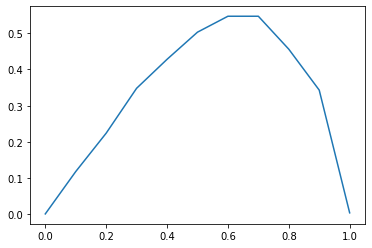

In [90]:
plt.plot(plst, results)

In [107]:
agent = MatchingAgent(world)

In [108]:
agent.make_choice()

True

In [109]:
agent.choice_history

[True]

In [128]:
# Let's simulate the matching agent now
world = RandomWorld([0.8], [10])
agent = MatchingAgent()

choices = []
rewards = []
for i in range(1000):
    choice = agent.make_choice()
    #print('choice = ', int(choice))
    choices.append(choice)
    reward = world.update(choice)
    #print('reward = ', int(reward))
    agent.outcome_received(reward)
    rewards.append(reward)

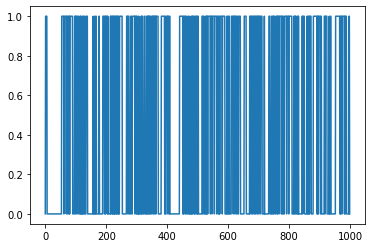

In [129]:
plt.plot(rewards)

In [130]:
np.sum(agent.choice_history)

811